## Stopword Removal Using NLTK
We'll use the NLTK stopword list and compare before vs after.


In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

text = "The quick brown fox jumps over the lazy dog while the dog sleeps."

tokens = text.split()  # simple tokenization
stop_words = set(stopwords.words('english'))

# Filter out stopwords
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)


Original Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'while', 'the', 'dog', 'sleeps.']
Filtered Tokens: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'dog', 'sleeps.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Customizing Stopword Lists
In some cases, you may want to:
- Add domain-specific stopwords (like “subject”, “object”, “data” in academic text)
- Keep words like “not” or “no” if they affect sentiment


In [5]:
custom_stopwords = stop_words.copy()

# Add and remove words based on context
custom_stopwords.add('dog')
custom_stopwords.remove('not')

custom_filtered = [word for word in tokens if word.lower() not in custom_stopwords]
print("Custom Filtered Tokens:", custom_filtered)


Custom Filtered Tokens: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'sleeps.']


## Stopwords in spaCy

spaCy automatically marks stopwords during tokenization.
Each token object has an attribute `.is_stop` that returns True or False.


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Dogs are not lazy animals, but they do enjoy sleeping."

doc = nlp(text)

filtered_spacy = [token.text for token in doc if not token.is_stop]
print("Tokens without stopwords:", filtered_spacy)


Tokens without stopwords: ['Dogs', 'lazy', 'animals', ',', 'enjoy', 'sleeping', '.']


## Visualizing Stopword Effect

Let's visualize how many stopwords were removed compared to total tokens.


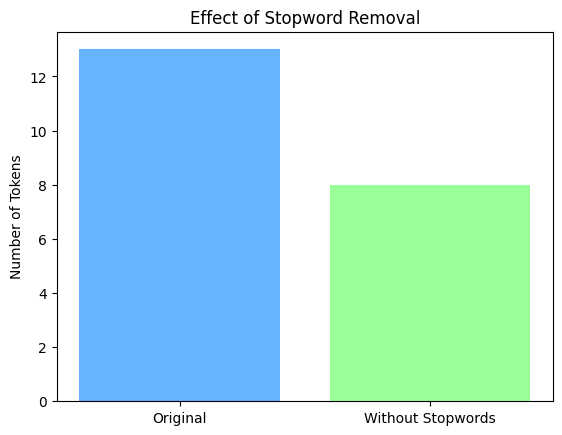

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

original = len(tokens)
filtered = len(filtered_tokens)

plt.bar(["Original", "Without Stopwords"], [original, filtered], color=['#66b3ff','#99ff99'])
plt.title("Effect of Stopword Removal")
plt.ylabel("Number of Tokens")
plt.show()


## Domain-Specific Filtering

Example: Custom Stopword Filtering for Tweets


In [7]:
tweet = "RT The market is going up and the traders are so excited!!!"
tokens = tweet.lower().split()
social_stopwords = set(['rt', 'the', 'is', 'and', 'are', 'so'])

cleaned_tweet = [t for t in tokens if t not in social_stopwords]
print("Cleaned Tweet:", cleaned_tweet)


Cleaned Tweet: ['market', 'going', 'up', 'traders', 'excited!!!']
